# Regression using a Neural Network (Keras)

In [341]:
import tensorflow.keras as keras
import sys
sys.modules['keras'] = keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd

In [342]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [343]:
housing.shape

(20640, 10)

### Data pre-processing: remove NaN

In [344]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [345]:
# there are 207 NaN in the column 'total_bedrooms', remove them
# check housing again using housing.isnull().sum()
housing['total_bedrooms'].fillna((housing['total_bedrooms'].mean()), inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Data pre-processing: Convert categorical data to numerical data - "ocean_proximity"

In [346]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [347]:
#We can use one-hot encoding method by calling pd.get_dummies
categorical_columns=['ocean_proximity'] # must be a list
housing = pd.get_dummies(housing, columns=categorical_columns)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


### Visualize the data

Text(0.5, 1.0, 'median_income')

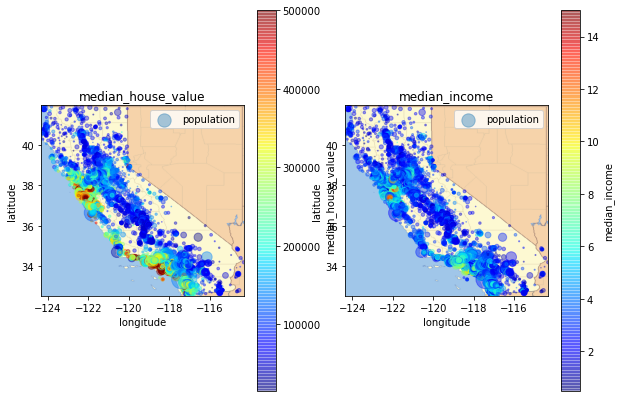

In [348]:
from skimage.io import imread
california_img = imread('california.png')
x1 = min(housing["longitude"].values)
x2 = max(housing["longitude"].values)
y1 = min(housing["latitude"].values)
y2 = max(housing["latitude"].values)
#---------------------------------------------
# the parameter c refers to color
# thus, median_house_value is color-coded in the left plot
fig, ax =plt.subplots(1,2)
housing.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
             s=housing['population']/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True, alpha=0.4, figsize=(10,7))
#---------------------------------------------
# the parameter c refers to color
# thus, median_income is color-coded in the right plot
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('median_house_value')
housing.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
             s=housing['population']/100, label="population",
             c="median_income", cmap=plt.get_cmap("jet"),
             colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('median_income')

### Prepare the Training and Testing Datasets

In [349]:
X=housing.drop(['median_house_value'], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [350]:
Y=housing['median_house_value']
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [351]:
# convert pandas dataframe/series to numpy array
# sklearn functions may not work well with pandas data types
X_columns=X.columns #store the column names
X=X.values.astype('float32')
Y=Y.values.astype('float32')

### trainnig, validation, testing split

In [352]:
#trainnig, validation, testing split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#split X_train and Y_train into a 'pure' training set and a validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (14860, 13) (14860,)
validation: (1652, 13) (1652,)
test: (4128, 13) (4128,)


In [353]:
#apply feature normalization to training, validation and test sets
from sklearn.preprocessing import MinMaxScaler
scalerX=MinMaxScaler()
scalerX.fit(X_train) # think about why fit to X_train, not X ?
X_train=scalerX.transform(X_train)
X_val=scalerX.transform(X_val)
X_test=scalerX.transform(X_test)


In [354]:
X_train[0]

array([0.5786848 , 0.38044596, 0.19607843, 0.12570114, 0.13671634,
       0.00983827, 0.02795593, 0.11055019, 0.        , 1.        ,
       0.        , 0.        , 0.        ], dtype=float32)

In [355]:
#normalize the output to facilitate convergence
Y_train_max=Y_train.max()
Y_train/=Y_train_max
Y_val/=Y_train_max
Y_test/=Y_train_max

### use LinearRegression as the baseline model

In [356]:
#step1:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True)

In [357]:
#step2:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [358]:
linear_model.coef_

array([-0.52667534, -0.47057638,  0.11070066, -0.31356546,  0.8725247 ,
       -2.8026872 ,  1.0090168 ,  1.130492  , -0.04724976, -0.12498008,
        0.26538274, -0.05612947, -0.03702466], dtype=float32)

In [359]:
linear_model.intercept_

0.54965335

Evaluate model on testing set
MSE= 0.018863907
MAE= 0.09931182
MAPE= 0.28951442


Text(0, 0.5, 'Y_test_pred')

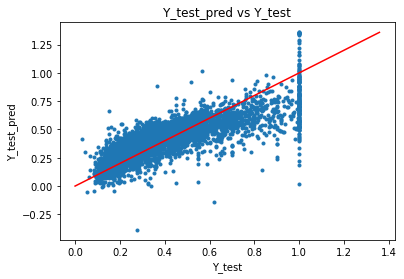

In [360]:
#step3:
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
#step6: 
# the red line is the 45-degree line
fig, ax = plt.subplots()
ax.set_title('Y_test_pred vs Y_test')
ax.plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')

## Your work begins here
see NN_nonlinear_regression_Keras.ipynb

#### define the model

In [361]:
import tensorflow.keras as keras
import sys
sys.modules['keras'] = keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython import display
import numpy as np


model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(13,)))
model.add(Dense(units=64, activation='relu', input_shape=(2,)))
model.add(Dense(units=32, activation='relu', input_shape=(2,)))
model.add(Dense(units=1, activation='sigmoid', input_shape=(2,)))
model.compile(loss='mse', optimizer=SGD(lr=0.1, momentum=0.9),metrics=['accuracy'])
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


#### Now, let's train the model for 100 epochs

In [362]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

In [363]:
for epoch in range(0, 10):
    #set epochs=1
    print('epoch', epoch)
    history=model.fit(X_train, Y_train, batch_size=1, epochs=1, validation_data=(X_val, Y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    

epoch 0
14860/14860 [==============================] - 43s 3ms/step - loss: 0.0315 - accuracy: 0.0325 - val_loss: 0.0327 - val_accuracy: 0.0400
epoch 1
14860/14860 [==============================] - 44s 3ms/step - loss: 0.0238 - accuracy: 0.0409 - val_loss: 0.0213 - val_accuracy: 0.0424
epoch 2
14860/14860 [==============================] - 44s 3ms/step - loss: 0.0231 - accuracy: 0.0406 - val_loss: 0.0220 - val_accuracy: 0.0381
epoch 3
14860/14860 [==============================] - 42s 3ms/step - loss: 0.0225 - accuracy: 0.0415 - val_loss: 0.0241 - val_accuracy: 0.0400
epoch 4
14860/14860 [==============================] - 35s 2ms/step - loss: 0.0223 - accuracy: 0.0409 - val_loss: 0.0199 - val_accuracy: 0.0418
epoch 5
14860/14860 [==============================] - 42s 3ms/step - loss: 0.0220 - accuracy: 0.0415 - val_loss: 0.0233 - val_accuracy: 0.0424
epoch 6
14860/14860 [==============================] - 44s 3ms/step - loss: 0.0217 - accuracy: 0.0406 - val_loss: 0.0206 - val_accuracy:

plot the loss vs epoch curve

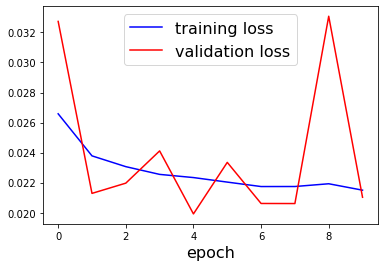

In [364]:
fig, ax = plt.subplots()
ax.plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax.plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax.set_xlabel('epoch',fontsize=16)
ax.legend(fontsize=16)

after training, we evaluate the model on the test dataset

In [365]:
# get the loss on test set
score = model.evaluate(X_test, Y_test, batch_size=64, verbose=0)
print('Test loss:', score)

Test loss: [0.019571026787161827, 0.03948643431067467]


In [366]:
#get Yp_test by using model.predict
Yp_test=model.predict(X_test, batch_size=64)

In [367]:
type(Yp_test)

numpy.ndarray

In [368]:
Yp_test.shape

(4128, 1)

In [369]:
Yp_test=Yp_test.squeeze()

In [370]:
Yp_test.shape

(4128,)

In [371]:
Y_test.shape

(4128,)

In [372]:
# compute MSE, MAE and MAPE on the test set

print('Evaluate model on testing set')
MSE_test = np.mean((Y_test - Yp_test )**2)
MAE_test = np.mean(np.abs(Y_test - Yp_test ))
MAPE_test =  np.mean(np.abs(Y_test - Yp_test )/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)


Evaluate model on testing set
MSE= 0.018863907
MAE= 0.09931182
MAPE= 0.28951442


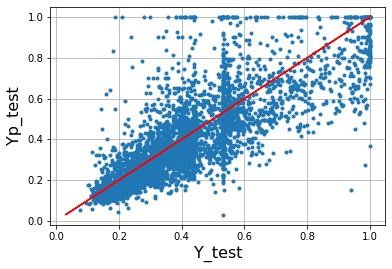

In [373]:
# plot Yp_test vs Y_test
# the red line is the 45-degree line

fig, ax = plt.subplots()
ax.plot(Yp_test, Y_test, '.')
ax.plot(Y_test, Y_test, 'r-')
ax.set_xlabel('Y_test', fontsize=16)
ax.set_ylabel('Yp_test', fontsize=16)
ax.grid(True)

# The method of XGBboost

In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [375]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [376]:
housing.shape

(20640, 10)

In [377]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [378]:
# there are 207 NaN in the column 'total_bedrooms', remove them
# check housing again using housing.isnull().sum()
housing['total_bedrooms'].fillna((housing['total_bedrooms'].mean()), inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [379]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [380]:
#We can use one-hot encoding method by calling pd.get_dummies
categorical_columns=['ocean_proximity'] # must be a list
housing = pd.get_dummies(housing, columns=categorical_columns)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


Text(0.5, 1.0, 'median_income')

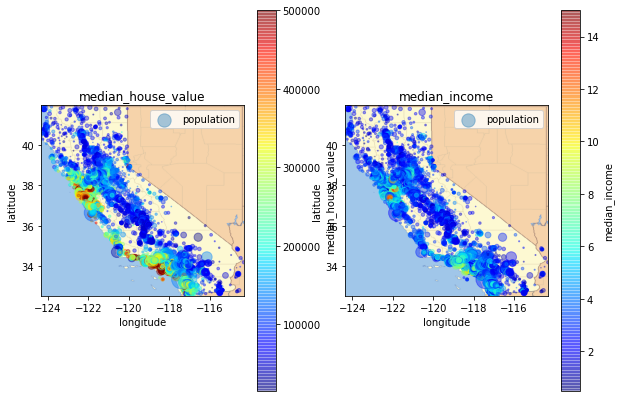

In [381]:
from skimage.io import imread
california_img = imread('california.png')
x1 = min(housing["longitude"].values)
x2 = max(housing["longitude"].values)
y1 = min(housing["latitude"].values)
y2 = max(housing["latitude"].values)
#---------------------------------------------
# the parameter c refers to color
# thus, median_house_value is color-coded in the left plot
fig, ax =plt.subplots(1,2)
housing.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
             s=housing['population']/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True, alpha=0.4, figsize=(10,7))
#---------------------------------------------
# the parameter c refers to color
# thus, median_income is color-coded in the right plot
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('median_house_value')
housing.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
             s=housing['population']/100, label="population",
             c="median_income", cmap=plt.get_cmap("jet"),
             colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('median_income')

In [382]:
X=housing.drop(['median_house_value'], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [383]:
Y=housing['median_house_value']
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [384]:
# convert pandas dataframe/series to numpy array
# sklearn functions may not work well with pandas data types
X_columns=X.columns #store the column names
X=X.values
Y=Y.values

In [386]:
#apply feature normalization to training, validation and test sets
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train) # think about why fit to X_train, not X ?
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [387]:
type(X_train)

numpy.ndarray

In [388]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=20, random_state=0, objective='reg:squarederror')

In [389]:
#create an array of possible max_depth

max_depth=30

max_depth_list=np.arange(1,max_depth+1)

max_depth_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [390]:
#MAE_train_list=[]
#MAE_val_list=[]
#grid search

MAE_train_list=[]
MAE_val_list=[]

for k in max_depth_list:
    model=xgb.XGBRegressor(n_estimators=20,max_depth=k,random_state=0, objective='reg:squarederror')
    model.fit(X_train, Y_train)
    
    Y_val_pred=model.predict(X_val)
    MAE_val = np.mean(np.abs(Y_val - Y_val_pred))
    
    Y_train_pred=model.predict(X_train)
    MAE_training = np.mean(np.abs(Y_train - Y_train_pred))

    MAE_train_list.append(MAE_training)
    MAE_val_list.append(MAE_val)

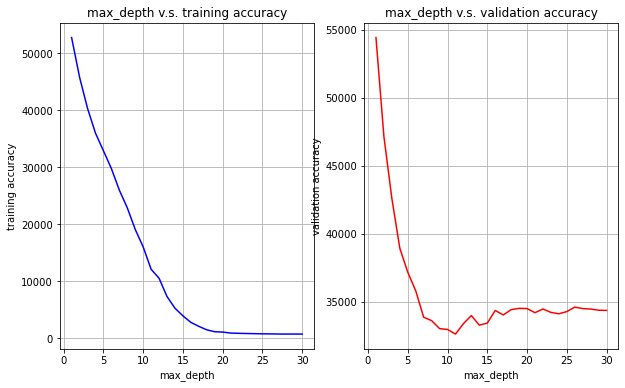

In [391]:
# plot

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, MAE_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('max_depth v.s. training accuracy')
ax[0].grid(True)

ax[1].plot(max_depth_list, MAE_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('max_depth v.s. validation accuracy')
ax[1].grid(True)

In [392]:
#find max_depth_best using np.argmin, max_depth_list and MAE_val_list
Temp1 = np.argmin(MAE_val_list,axis=0) 
max_depth_best =(max_depth_list[Temp1])
max_depth_best

11

In [393]:
#train and test a XGBRegressor using the best max_depth


model = xgb.XGBRegressor(n_estimators=20,max_depth=max_depth_best,random_state=0, objective='reg:squarederror')
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print('Evaluate model on traning set')
MSE_XGBoost = np.mean((Y_train - Y_train_pred)**2)
MAE_XGBoost= np.mean(np.abs(Y_train - Y_train_pred))
MAPE_XGBoost =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE_XGBoost )
print('MAE=', MAE_XGBoost)
print('MAPE=', MAPE_XGBoost)

print('Evaluate model on testing set')
MSE_XGBoost = np.mean((Y_test - Y_test_pred)**2)
MAE_XGBoost= np.mean(np.abs(Y_test - Y_test_pred))
MAPE_XGBoost =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE_XGBoost)
print('MAE=', MAE_XGBoost)
print('MAPE=', MAPE_XGBoost)

Evaluate model on traning set
MSE= 311695561.7753502
MAE= 12119.912758007024
MAPE= 0.06891800921696084
Evaluate model on testing set
MSE= 2292813525.478662
MAE= 32029.049320191378
MAPE= 0.1788979515255204


In [394]:
print('MLP model', 'MSE=',round(MSE_test,9),'MAE=',round(MAE_test,8), 'MAPE=',round(MAPE_test,8))
print('XGBoost  ', 'MSE=',MSE_XGBoost, 'MAE=',MAE_XGBoost, 'MAPE=',MAPE_XGBoost)

MLP model MSE= 0.019571029 MAE= 0.09843588 MAPE= 0.2802625
XGBoost   MSE= 2292813525.478662 MAE= 32029.049320191378 MAPE= 0.1788979515255204


In [395]:
import statistics

print('MLP model',statistics.mean(acc_val_list))

print('XGBoost',MAE_val_list[max_depth_best])

MLP model 0.04213075079023838
XGBoost 33383.13865532309


In [ ]:
# Conclusion:
# 1. Based on the result, we can find that the MSE/ MAE/ MAPE of the MLP model are 0.019, 0.098, and 0.28. The MSE/ MAE/ MAPE of 
#    XGBoost are 22928, 32029, and 0.178. Therefore, the method of MLP model is better than  the method of XGBoost.
# 2. About accurency, the MLP model is 0.042. The XGBoost is 33383. Therefore, the accurncy of MLP model is also better than 
#   the accurncy of XGBoost.